# 2.1 Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
train_store_df = pd.read_csv('clean_train_store.csv',low_memory = False)

In [3]:
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204187 entries, 0 to 204186
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      204187 non-null  int64  
 1   DayOfWeek                  204187 non-null  int64  
 2   Date                       204187 non-null  object 
 3   Sales                      204187 non-null  int64  
 4   Customers                  204187 non-null  int64  
 5   Open                       204187 non-null  int64  
 6   Promo                      204187 non-null  int64  
 7   StateHoliday               204187 non-null  object 
 8   SchoolHoliday              204187 non-null  int64  
 9   Year                       204187 non-null  int64  
 10  Month                      204187 non-null  int64  
 11  Day                        204187 non-null  int64  
 12  WeekOfYear                 204187 non-null  int64  
 13  SalePerCustomer            20

In [4]:
# columns to be use:['DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday','SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear']

# Lable Date and StateHoiday Train:

columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

sample_size = 1000
sampled_df = train_store_df[columns].sample(sample_size)


# Separate Test and train files:
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
43160,48,6,1,0,0,7,6,2,2015,a,a,1060.0,0
139839,154,1,1,1,0,18,12,3,2013,d,c,16420.0,0
170594,189,7,0,0,0,28,39,9,2014,d,a,5760.0,0
51,1,3,1,0,0,10,24,6,2015,c,a,1270.0,0
56060,62,1,1,1,0,19,21,5,2014,a,a,2050.0,0


In [5]:
# Label encoding: 

lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 43160 to 201433
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1000 non-null   int64  
 1   DayOfWeek            1000 non-null   int64  
 2   Open                 1000 non-null   int64  
 3   Promo                1000 non-null   int64  
 4   SchoolHoliday        1000 non-null   int64  
 5   Day                  1000 non-null   int64  
 6   WeekOfYear           1000 non-null   int64  
 7   Month                1000 non-null   int64  
 8   Year                 1000 non-null   int64  
 9   StoreType            1000 non-null   int32  
 10  Assortment           1000 non-null   int32  
 11  CompetitionDistance  1000 non-null   float64
 12  Promo2               1000 non-null   int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 101.6 KB


In [6]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# X = x_scaler.fit_transform(train_x)
X = train_x
Y = y_scaler.fit_transform(train_y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=25, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [9]:
score = rf_reg.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 70.47%


In [61]:
!pip install mlflow

     -------------------------------------- 18.3/18.3 MB 782.8 kB/s eta 0:00:00
     -------------------------------------- 57.7/57.7 kB 609.0 kB/s eta 0:00:00
     -------------------------------------- 41.2/41.2 kB 658.4 kB/s eta 0:00:00
     ------------------------------------ 430.4/430.4 kB 768.2 kB/s eta 0:00:00
     -------------------------------------- 83.5/83.5 kB 779.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 21.5/21.5 MB 799.7 kB/s eta 0:00:00
     ------------------------------------ 188.5/188.5 kB 813.9 kB/s eta 0:00:00
     ------------------------------------ 225.4/225.4 kB 724.6 kB/s eta 0:00:00
     ------------------------------------ 148.1/148.1 kB 733.3 kB/s eta 0:00:00
     -------------------------------------- 78.7/78.7 kB 728.0 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 822.4 kB/s eta 0:00:00
     -------------

In [62]:
import mlflow
import mlflow.sklearn

In [65]:
def train_model(X, Y, model_type='LinearRegression'):
    model = LinearRegression()
    
    if(model_type == 'RandomForest'):
        model = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0)
    
        
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        with mlflow.start_run(run_name=model_type, nested = True):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            print(f"Prediction Score of the {model_type} is {round(score * 100, 2)}%")
            
            if(model_type == 'LinearRegression'):
                mlflow.log_param('LR-Score', score)
                
            if(model_type == 'RandomForest'):
                mlflow.log_param('RF-Score', score)
                
            mlflow.sklearn.log_model(model, model_type +' Model')
            mlflow.end_run()
            
    print()

## Running this code will create multiple mflow models 
## Create a branch before running this file

# train_model(X, Y, "RandomForest")
# train_model(X, Y)

# 2.2 Building models with sklearn pipelines

In [10]:
# Preparing the train and test features:
x = train_x
y = train_y

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [11]:
# Set Pipe Lines:

rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regretion', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regretion', DecisionTreeRegressor(random_state = 0)  )
])


In [12]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regretion', DecisionTreeRegressor(random_state=0))])

In [13]:
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"Prediction Score of the RandomForestRegretion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegretion is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")

# print(rfr_score)

Prediction Score of the RandomForestRegretion is 63.47%
Prediction Score of the LinearRegretion is 57.65%
Prediction Score of the DecisionTree is 50.02%


# 2.3 Choose a loss function

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)

# Calculate RMSE for each model
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_prediction))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_prediction))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_prediction))

# Print RMSE for each model
print(f"RandomForest Root Mean Square Error: {rfr_rmse}")
print(f"Linear Root Mean Square Error: {lr_rmse}")
print(f"DecisionTree Root Mean Square Error: {dt_rmse}")

RandomForest Root Mean Square Error: 2058.9773134579336
Linear Root Mean Square Error: 2217.142471012501
DecisionTree Root Mean Square Error: 2408.6399513003184


# 2.4 Post Prediction analysis

In [40]:
important_features = rfr[1].feature_importances_

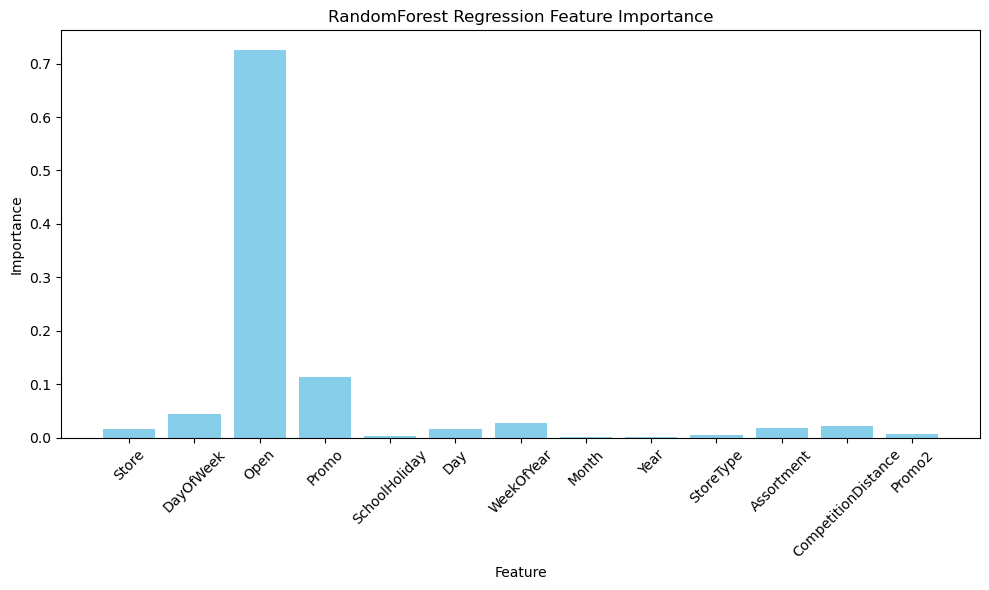

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(feature_columns, important_features, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('RandomForest Regression Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

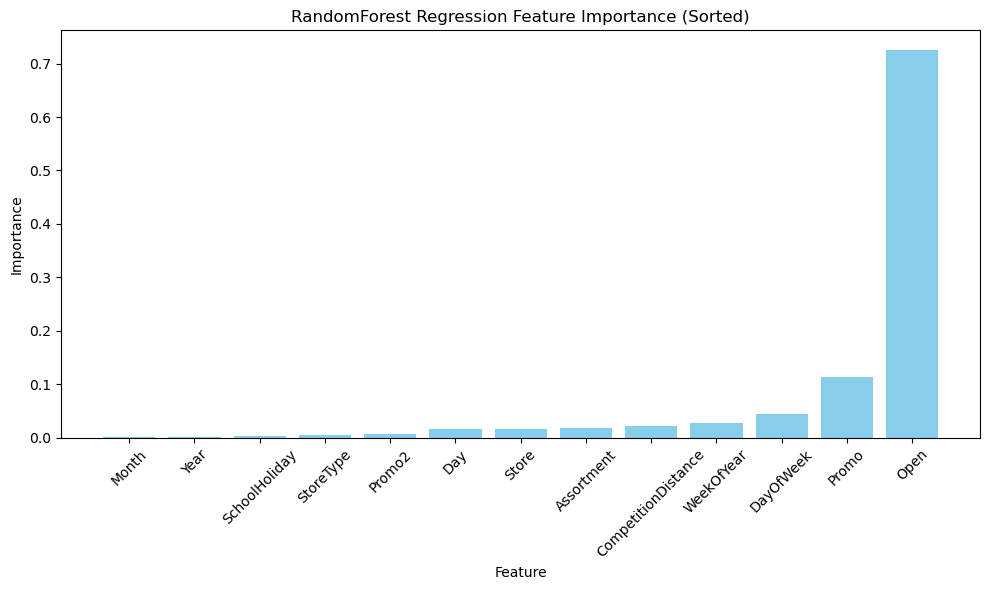

In [42]:
sorted_indices = important_features.argsort()
sorted_features = [feature_columns[i] for i in sorted_indices]
sorted_importances = important_features[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('RandomForest Regression Feature Importance (Sorted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
important_features = lr[1].coef_[0]
from matplotlib import pyplot as plt

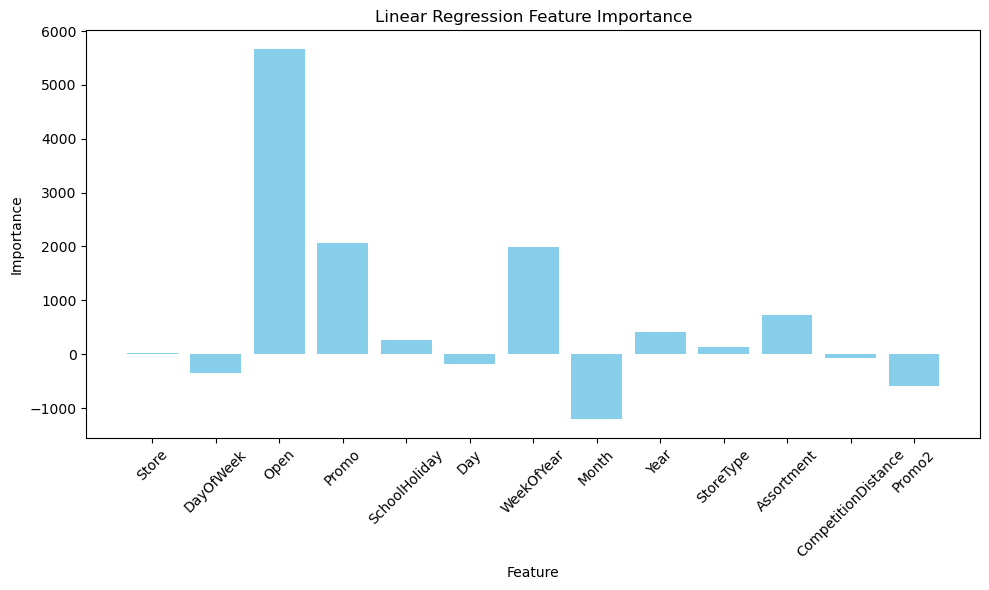

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(feature_columns, list(important_features), color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Linear Regression Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
important_features = dt[1].feature_importances_

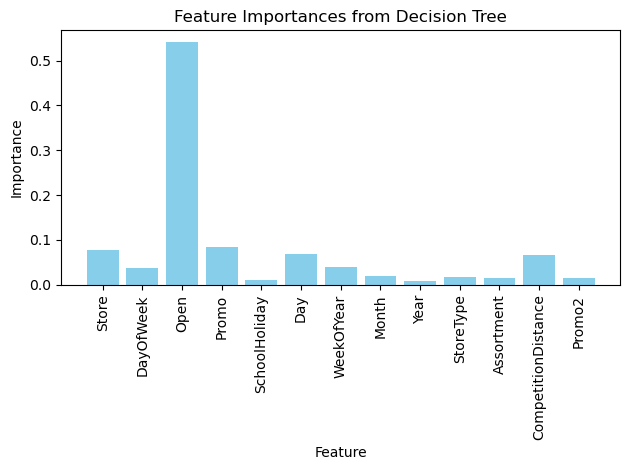

In [50]:
important_features = dt[1].feature_importances_
plt.bar(feature_columns, important_features, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()

# 2.5 Serialize models

In [66]:
import pickle # Read and Save model - Serialization
from datetime import datetime

In [67]:
## use picke to dump mode
## decomment picke to save the model
from time import gmtime, strftime
time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())
reg_model_file_name = f'../models/reg-{time}.pkl'
lr_model_file_name = f'../models/lt-{time}.pkl'
dt_model_file_name = f'../models/dt-{time}.pkl'

files = [reg_model_file_name, lr_model_file_name, dt_model_file_name]
models = [rfr, lr, dt]

print(reg_model_file_name)


for i in range(len(files)):
    pickle.dump(models[i], open(files[i], 'wb'))

../models/reg-2023-08-24-14-26-51.pkl


In [68]:
rg_file = '../models/reg-2023-08-24-14-26-51.pkl'

rg_model = pickle.load(open(rg_file, 'rb'))

In [72]:
rg_score = rg_model.score(X_test, y_test)
rg_score

0.6347434125735694